# Two Body Problem

This is a relatively simple test problem that demonstrates the code's ability to deal with gravity – specifically using the [leapfrog integrator](https://en.wikipedia.org/wiki/Leapfrog_integration). We can construct a system of two particles with initial velocities and positions and test the stability of the leapfrog integrator to evolve the system forward in time under the influence of the mutual gravitational interaction. 

If we have two particles of masses $m_1$ and $m_2$ at positions $\vec{r}_1$ and $\vec{r}_2$, so the reduced mass $\mu = m_1m_2/(m_1+m_2)$ and the separation vector is $\vec{r} = \vec{r}_1 - \vec{r}_2$, then the equation of motion is given by:
$$ \mu \frac{d^2\vec{r}}{dt^2} = -\frac{Gm_1m_2}{r^2}\hat{r}$$
which yields a solution (in polar coordinates) of
$$ r = \frac{a(1-\epsilon^2)}{1-\epsilon\cos\theta}$$
where $a$ and $\epsilon$ are parameter choices. We know that this solution evolves with a period of $T = \sqrt{\frac{4\pi^2a^3}{G(m_1+m_2)}}$ (Kepler's third law) and the particle positions can be written as $\vec{r}_1 = m_1/(m_1+m_2)\vec{r}$ and likewise for $\vec{r}_2$. If $q = m_1/m_2$ (the ratio of the particle masses) then this solution applies for initial conditions
$$
\vec{r}_1 = a\frac{1-\epsilon}{1+q}\hat{x} \\
\vec{v}_1 = \frac{1}{1+q}\sqrt{\frac{1+\epsilon}{1-\epsilon}}\sqrt{\frac{G(m_1+m_2)}{a}}\hat{y} \\
\vec{r}_2 = -q\vec{r}_1 \\ 
\vec{v}_2 = -q\vec{v}_1
$$
For this problem, we use $a=0.5$ and $\epsilon = 1/2$, $G = 1$, and evolve the system for ten periods.

In [1]:
import phd
import numpy as np

We can then construct a particle object with two particles as per the above description.

In [2]:
a = 0.5
c = 0.25
e = c/a

G = 1.0
m1 = 1.0
m2 = 2.0
q = m1/m2 
m = m1 + m2
T = np.sqrt(4.*np.pi**2*a**3/(G*m))
dt = T/1000.

r0 = (1. - e)/(1. + q)*a
v0 = 1./(1. + q)*np.sqrt((1+e)/(1-e))*np.sqrt(G*m/a)

num_part = 2
particles, units = phd.HydroParticleCreator(num_part, dim=2, unit_sys = "cgs")

particles["mass"][:] = np.array([m1, m2])
particles["position-x"][:] = np.array([r0, -q*r0])
particles["position-y"][:] = np.array([0., 0.])
particles["velocity-x"][:] = np.array([0., 0.])
particles["velocity-y"][:] = np.array([v0, -q*v0])

In [3]:
# computation related to boundaries
domain_manager = phd.DomainManager(
        xmin=[-1., -1.], xmax=[1., 1.],
        initial_radius=0.1) 

# setup gravity
gravity_tree = phd.GravityTree(barnes_angle=0.4,
        smoothing_length=0.0, calculate_potential=1)

# computation
integrator = phd.Nbody(dt=dt)
integrator.set_particles(particles)
integrator.set_domain_manager(domain_manager)
integrator.set_gravity_tree(gravity_tree)
integrator.set_units(units)

# add finish criteria
simulation_time_manager = phd.SimulationTimeManager()
simulation_time_manager.add_finish(phd.Time(time_max=10*T))

# output first step
output = phd.InitialOutput()
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

# output last step
output = phd.FinalOutput()
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

# output every time step
output = phd.IterationInterval(iteration_interval=10)
output.set_writer(phd.Hdf5())
simulation_time_manager.add_output(output)

# Create simulator
simulation = phd.Simulation(simulation_name="two_body", log_level = "startup")
simulation.set_integrator(integrator)
simulation.set_simulation_time_manager(simulation_time_manager)
simulation.initialize()
simulation.solve()

phd: [STARTUP  ] 2021-07-28 10:42:48,640: 

 __________.__         .___
\______   \  |__    __| _/
 |     ___/  |  \  / __ |
 |    |   |   Y  \/ /_/ |
 |____|   |___|  /\____ |
               \/      \/
Welcome to Python Hydro-Dynamics!

Simulation Information
------------------------------
Running in serial
Log file saved at: two_body.log
Problem solving: two_body
Output data will be saved at: two_body_output

Classes used in the simulation
------------------------------
boundary_condition: Not Defined
domain_manager: DomainManager
gravity_tree: GravityTree
integrator: Nbody
mesh: Not Defined
particles: CarrayContainer
reconstruction: Not Defined
riemann: Not Defined
units: Units

phd: [SUCCESS  ] 2021-07-28 10:42:56,917: Simulation successfully finished!


We can then plot the positions of the particles and see that they agree well with the analytic prescription. We can also plot the energy over time and see that it is quite well conserved (the $\Delta E$ stays very close to 0). 

phd: [INFO     ] 2021-06-02 18:56:17,615: hdf5 format: Reading filename two_body_output/initial_output/initial_output0000/initial_output0000.hdf5
phd: [INFO     ] 2021-06-02 18:56:17,631: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0001/iteration_interval0001.hdf5
phd: [INFO     ] 2021-06-02 18:56:17,645: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0002/iteration_interval0002.hdf5
phd: [INFO     ] 2021-06-02 18:56:17,657: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0003/iteration_interval0003.hdf5
phd: [INFO     ] 2021-06-02 18:56:17,668: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0004/iteration_interval0004.hdf5
phd: [INFO     ] 2021-06-02 18:56:17,678: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0005/iteration_interval0005.hdf5
phd: [INFO     ] 2021-06-02 18:56:17,688: hdf5 format: Reading f

phd: [INFO     ] 2021-06-02 18:56:18,166: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0050/iteration_interval0050.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,177: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0051/iteration_interval0051.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,189: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0052/iteration_interval0052.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,199: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0053/iteration_interval0053.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,209: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0054/iteration_interval0054.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,220: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0055/iteration_interval0055.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,230: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:18,716: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0100/iteration_interval0100.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,727: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0101/iteration_interval0101.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,738: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0102/iteration_interval0102.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,748: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0103/iteration_interval0103.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,759: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0104/iteration_interval0104.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,769: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0105/iteration_interval0105.hdf5
phd: [INFO     ] 2021-06-02 18:56:18,782: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:19,257: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0150/iteration_interval0150.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,267: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0151/iteration_interval0151.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,279: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0152/iteration_interval0152.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,290: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0153/iteration_interval0153.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,301: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0154/iteration_interval0154.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,311: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0155/iteration_interval0155.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,323: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:19,787: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0200/iteration_interval0200.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,798: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0201/iteration_interval0201.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,810: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0202/iteration_interval0202.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,820: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0203/iteration_interval0203.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,832: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0204/iteration_interval0204.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,843: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0205/iteration_interval0205.hdf5
phd: [INFO     ] 2021-06-02 18:56:19,853: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:20,383: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0250/iteration_interval0250.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,393: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0251/iteration_interval0251.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,403: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0252/iteration_interval0252.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,413: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0253/iteration_interval0253.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,423: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0254/iteration_interval0254.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,433: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0255/iteration_interval0255.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,443: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:20,919: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0300/iteration_interval0300.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,930: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0301/iteration_interval0301.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,942: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0302/iteration_interval0302.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,953: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0303/iteration_interval0303.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,964: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0304/iteration_interval0304.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,974: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0305/iteration_interval0305.hdf5
phd: [INFO     ] 2021-06-02 18:56:20,985: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:21,441: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0350/iteration_interval0350.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,451: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0351/iteration_interval0351.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,461: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0352/iteration_interval0352.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,472: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0353/iteration_interval0353.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,482: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0354/iteration_interval0354.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,492: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0355/iteration_interval0355.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,502: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:21,950: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0400/iteration_interval0400.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,960: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0401/iteration_interval0401.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,970: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0402/iteration_interval0402.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,981: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0403/iteration_interval0403.hdf5
phd: [INFO     ] 2021-06-02 18:56:21,991: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0404/iteration_interval0404.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,001: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0405/iteration_interval0405.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,011: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:22,459: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0450/iteration_interval0450.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,469: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0451/iteration_interval0451.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,479: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0452/iteration_interval0452.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,490: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0453/iteration_interval0453.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,500: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0454/iteration_interval0454.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,510: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0455/iteration_interval0455.hdf5
phd: [INFO     ] 2021-06-02 18:56:22,520: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:23,118: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0500/iteration_interval0500.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,134: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0501/iteration_interval0501.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,159: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0502/iteration_interval0502.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,179: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0503/iteration_interval0503.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,199: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0504/iteration_interval0504.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,217: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0505/iteration_interval0505.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,234: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:23,928: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0550/iteration_interval0550.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,937: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0551/iteration_interval0551.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,947: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0552/iteration_interval0552.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,957: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0553/iteration_interval0553.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,966: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0554/iteration_interval0554.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,975: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0555/iteration_interval0555.hdf5
phd: [INFO     ] 2021-06-02 18:56:23,985: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:24,546: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0600/iteration_interval0600.hdf5
phd: [INFO     ] 2021-06-02 18:56:24,558: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0601/iteration_interval0601.hdf5
phd: [INFO     ] 2021-06-02 18:56:24,569: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0602/iteration_interval0602.hdf5
phd: [INFO     ] 2021-06-02 18:56:24,581: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0603/iteration_interval0603.hdf5
phd: [INFO     ] 2021-06-02 18:56:24,592: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0604/iteration_interval0604.hdf5
phd: [INFO     ] 2021-06-02 18:56:24,602: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0605/iteration_interval0605.hdf5
phd: [INFO     ] 2021-06-02 18:56:24,615: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:25,130: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0650/iteration_interval0650.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,143: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0651/iteration_interval0651.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,157: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0652/iteration_interval0652.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,170: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0653/iteration_interval0653.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,181: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0654/iteration_interval0654.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,193: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0655/iteration_interval0655.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,203: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:25,641: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0700/iteration_interval0700.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,652: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0701/iteration_interval0701.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,661: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0702/iteration_interval0702.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,671: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0703/iteration_interval0703.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,681: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0704/iteration_interval0704.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,690: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0705/iteration_interval0705.hdf5
phd: [INFO     ] 2021-06-02 18:56:25,699: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:26,141: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0750/iteration_interval0750.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,153: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0751/iteration_interval0751.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,164: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0752/iteration_interval0752.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,173: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0753/iteration_interval0753.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,183: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0754/iteration_interval0754.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,192: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0755/iteration_interval0755.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,202: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:26,663: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0800/iteration_interval0800.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,672: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0801/iteration_interval0801.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,681: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0802/iteration_interval0802.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,690: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0803/iteration_interval0803.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,699: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0804/iteration_interval0804.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,708: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0805/iteration_interval0805.hdf5
phd: [INFO     ] 2021-06-02 18:56:26,717: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:27,124: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0850/iteration_interval0850.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,133: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0851/iteration_interval0851.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,143: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0852/iteration_interval0852.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,153: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0853/iteration_interval0853.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,164: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0854/iteration_interval0854.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,174: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0855/iteration_interval0855.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,184: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:27,625: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0900/iteration_interval0900.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,634: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0901/iteration_interval0901.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,644: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0902/iteration_interval0902.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,654: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0903/iteration_interval0903.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,663: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0904/iteration_interval0904.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,672: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0905/iteration_interval0905.hdf5
phd: [INFO     ] 2021-06-02 18:56:27,682: hdf5 forma

phd: [INFO     ] 2021-06-02 18:56:28,089: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0950/iteration_interval0950.hdf5
phd: [INFO     ] 2021-06-02 18:56:28,098: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0951/iteration_interval0951.hdf5
phd: [INFO     ] 2021-06-02 18:56:28,107: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0952/iteration_interval0952.hdf5
phd: [INFO     ] 2021-06-02 18:56:28,116: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0953/iteration_interval0953.hdf5
phd: [INFO     ] 2021-06-02 18:56:28,125: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0954/iteration_interval0954.hdf5
phd: [INFO     ] 2021-06-02 18:56:28,135: hdf5 format: Reading filename two_body_output/iteration_interval/iteration_interval0955/iteration_interval0955.hdf5
phd: [INFO     ] 2021-06-02 18:56:28,144: hdf5 forma

energy min: -0.00010729717290347542 energy max: -0.0


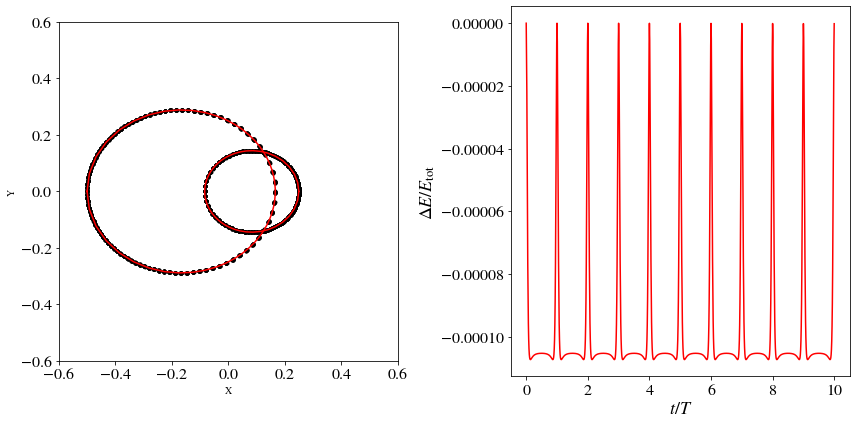

In [6]:
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "STIXGeneral"
mpl.rcParams["xtick.labelsize"] = 16
mpl.rcParams["ytick.labelsize"] = 16

fig, axes = plt.subplots(1,2, figsize=(12,6))
reader = phd.Hdf5()

num = 1000
ax = axes[0]
time = np.zeros(num)
potential = np.zeros(num)
kinetic = np.zeros(num)
energy = np.zeros(num)
for i in range(num):

    if i == 0:
        file_name="two_body_output/initial_output/initial_output0000/initial_output0000.hdf5"
    else:
        file_name="two_body_output/iteration_interval/iteration_interval"+str(i).zfill(4)
        file_name=file_name+"/iteration_interval"+str(i).zfill(4)+".hdf5"

    particles, units = reader.read(file_name)
    ax.plot(particles["position-x"][0], particles["position-y"][0], ".k")
    ax.plot(particles["position-x"][1], particles["position-y"][1], ".k")

    v2 = particles["velocity-x"]**2 + particles["velocity-y"]**2
    kinetic[i] = (0.5*particles["mass"]*v2).sum()
    potential[i] = 0.5*(particles["mass"]*particles["potential"]).sum()
    energy[i] = kinetic[i] + potential[i]

    if i == 0:
        E0 = energy[i]

    time[i] = h5py.File(file_name, "r").attrs["time"]

error = (energy-E0)/E0
print("energy min:", error.min(), "energy max:", error.max())
ax.set_xlabel("X")
ax.set_ylabel("Y")

T0 = np.sqrt(4.*np.pi**2*a**3/(G*m))
theta = np.linspace(0, 2*np.pi)
r = a*(1-e**2)/(1.-e*np.cos(theta))

x = r*np.cos(theta)
y = r*np.sin(theta)

x1 = m1*x/m
y1 = m1*y/m
x2 = -m2*x/m
y2 = -m2*y/m

# plot true solution
ax.plot(x1, y1, "r")
ax.plot(x2, y2, "r")
ax.set_xlim(-.6, .6)
ax.set_ylim(-.6, .6)
ax.set_aspect("equal")

ax = axes[1]
ax.plot(time/T0, error, c="red")
ax.set_xlabel(r"$t/T$", fontsize=18)
ax.set_ylabel(r"$\Delta E/E_{\mathrm{tot}}$", fontsize=18)

plt.tight_layout()
plt.savefig("two_body.png")
plt.show()